In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "uber-ride-analytics-dashboard"

# **Uber Ride Analytics - Beginner R project**
# **1.Introduction**
### This project is serves as mini tutorial to practice fundamental data analysis skills in R
# **2.Problem statement**
### The main goal of this analysis is to explore the patterns in the Uber rides and find insights
### 2.1 Overall Performance: What is the overall ride completion rate, and what are the specific rates for each type of cancellation?
### 2.2 Location-Based Patterns: Are there starting or ending points with high cancellation rates or where a driver was not found?
### 2.3 Vehicle Type Analysis: Do certain vehicle types have higher customer or driver cancellation rates?
### 2.4 Waiting Time & Completion: Is there a relationship between waiting time and likelihood of cancellation?
# **3. Data Source**
### The dataset is from Kaggle: /kaggle/input/uber-ride-analytics-dashboard
# **4. Load libraries**
### Load libraries for data manipulation and analysis


In [2]:
library(readr)
library(dplyr) # for data analysis and manipulation
library(ggplot2) # for data visualization

# **5. Load Data**

In [3]:
list.files(path = "/kaggle/input/uber-ride-analytics-dashboard")

[1] "Dasboard.gif"          "ncr_ride_bookings.csv" "Uber.pbix"

In [4]:
uber_data <- read_csv("/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")

Rows: 150000 Columns: 21


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (19): Booking ID, Booking Status, Customer ID, Vehicle Type, Pickup Loc...
date  (1): Date
time  (1): Time



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(uber_data)
str(uber_data) # to check the structure and the data type

Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,⋯,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
<date>,<time>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,null,null,⋯,null,null,null,null,null,null,null,null,null,null
2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,⋯,null,null,null,1,Vehicle Breakdown,237,5.73,null,null,UPI
2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,⋯,null,null,null,null,null,627,13.58,4.9,4.9,Debit Card
2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,⋯,null,null,null,null,null,416,34.02,4.6,5.0,UPI
2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,⋯,null,null,null,null,null,737,48.21,4.1,4.3,UPI
2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,⋯,null,null,null,null,null,316,4.85,4.1,4.6,UPI


spc_tbl_ [150,000 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date                             : Date[1:150000], format: "2024-03-23" "2024-11-29" ...
 $ Time                             : 'hms' num [1:150000] 12:29:38 18:01:39 08:56:10 17:17:25 ...
  ..- attr(*, "units")= chr "secs"
 $ Booking ID                       : chr [1:150000] "\"CNR5884300\"" "\"CNR1326809\"" "\"CNR8494506\"" "\"CNR8906825\"" ...
 $ Booking Status                   : chr [1:150000] "No Driver Found" "Incomplete" "Completed" "Completed" ...
 $ Customer ID                      : chr [1:150000] "\"CID1982111\"" "\"CID4604802\"" "\"CID9202816\"" "\"CID2610914\"" ...
 $ Vehicle Type                     : chr [1:150000] "eBike" "Go Sedan" "Auto" "Premier Sedan" ...
 $ Pickup Location                  : chr [1:150000] "Palam Vihar" "Shastri Nagar" "Khandsa" "Central Secretariat" ...
 $ Drop Location                    : chr [1:150000] "Jhilmil" "Gurgaon Sector 56" "Malviya Nagar" "Inderlok" ...
 $ Avg VTAT     

# **6. Data Cleaning**

In [6]:
# List of columns to convert to numeric
numeric_cols <- c("Avg VTAT", "Avg CTAT", "Cancelled Rides by Customer",
                  "Cancelled Rides by Driver", "Incomplete Rides",
                  "Booking Value", "Ride Distance", "Driver Ratings",
                  "Customer Rating")
for(col in numeric_cols){
  # Replace "null" with NA and then convert the whole column to numeric
  uber_data[[col]] <- as.numeric(ifelse(uber_data[[col]] == "null", NA, uber_data[[col]]))
} # Loop through each column and convert to numeric

In [7]:
str(uber_data)
summary(uber_data)

spc_tbl_ [150,000 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date                             : Date[1:150000], format: "2024-03-23" "2024-11-29" ...
 $ Time                             : 'hms' num [1:150000] 12:29:38 18:01:39 08:56:10 17:17:25 ...
  ..- attr(*, "units")= chr "secs"
 $ Booking ID                       : chr [1:150000] "\"CNR5884300\"" "\"CNR1326809\"" "\"CNR8494506\"" "\"CNR8906825\"" ...
 $ Booking Status                   : chr [1:150000] "No Driver Found" "Incomplete" "Completed" "Completed" ...
 $ Customer ID                      : chr [1:150000] "\"CID1982111\"" "\"CID4604802\"" "\"CID9202816\"" "\"CID2610914\"" ...
 $ Vehicle Type                     : chr [1:150000] "eBike" "Go Sedan" "Auto" "Premier Sedan" ...
 $ Pickup Location                  : chr [1:150000] "Palam Vihar" "Shastri Nagar" "Khandsa" "Central Secretariat" ...
 $ Drop Location                    : chr [1:150000] "Jhilmil" "Gurgaon Sector 56" "Malviya Nagar" "Inderlok" ...
 $ Avg VTAT     

      Date                Time           Booking ID        Booking Status    
 Min.   :2024-01-01   Length:150000     Length:150000      Length:150000     
 1st Qu.:2024-03-31   Class1:hms        Class :character   Class :character  
 Median :2024-07-01   Class2:difftime   Mode  :character   Mode  :character  
 Mean   :2024-06-30   Mode  :numeric                                         
 3rd Qu.:2024-09-30                                                          
 Max.   :2024-12-30                                                          
                                                                             
 Customer ID        Vehicle Type       Pickup Location    Drop Location     
 Length:150000      Length:150000      Length:150000      Length:150000     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                    

In [8]:
# Select only the character columns to check for any remaining issues
uber_data_chr <- uber_data %>%
  select(where(is.character))
# Check for any remaining 'null' values or empty cells
colSums(uber_data_chr == "null", na.rm = TRUE)
colSums(uber_data_chr == "", na.rm = TRUE)
colSums(is.na(uber_data_chr))  # Check for R's missing values (NA)

Booking ID                    Booking Status 
                                0                                 0 
                      Customer ID                      Vehicle Type 
                                0                                 0 
                  Pickup Location                     Drop Location 
                                0                                 0 
Reason for cancelling by Customer        Driver Cancellation Reason 
                           139500                            123000 
          Incomplete Rides Reason                    Payment Method 
                           141000                             48000

Booking ID                    Booking Status 
                                0                                 0 
                      Customer ID                      Vehicle Type 
                                0                                 0 
                  Pickup Location                     Drop Location 
                                0                                 0 
Reason for cancelling by Customer        Driver Cancellation Reason 
                                0                                 0 
          Incomplete Rides Reason                    Payment Method 
                                0                                 0

Booking ID                    Booking Status 
                                0                                 0 
                      Customer ID                      Vehicle Type 
                                0                                 0 
                  Pickup Location                     Drop Location 
                                0                                 0 
Reason for cancelling by Customer        Driver Cancellation Reason 
                                0                                 0 
          Incomplete Rides Reason                    Payment Method 
                                0                                 0

### Overall Performance

In [9]:
overall_performance <- uber_data %>%
  group_by(`Booking Status`) %>%
  summarise(
    Total_Rides = n()
  ) %>%
  mutate(
    Percentage = (Total_Rides / sum(Total_Rides)) * 100
  ) # Calculate the percentage of rides for each booking status

print(overall_performance)

# A tibble: 5 × 3
  `Booking Status`      Total_Rides Percentage
  <chr>                       <int>      <dbl>
1 Cancelled by Customer       10500          7
2 Cancelled by Driver         27000         18
3 Completed                   93000         62
4 Incomplete                   9000          6
5 No Driver Found             10500          7



- **62% of rides were completed**, showing a majority of successful trips.  
- **18% of rides were cancelled by drivers** and **7% by customers**, making cancellations a significant challenge.  
- **7% of rides had no driver found**, suggesting possible supply-demand imbalance during peak hours or specific locations.  

**Recommendation:**  
* Focus on driver availability during peak times and identify high-demand zones for better driver allocation.  

### Location based patterns

In [10]:
# Count the total number of unique pickup locations
n_distinct(uber_data$`Pickup Location`)

# Count the total number of unique drop-off locations
n_distinct(uber_data$`Drop Location`)

[1] 176

[1] 176

In [11]:
# Find the top 10 pickup locations with the highest driver cancellation percentages
driver_cancel_pickup <- uber_data %>%
  group_by(`Pickup Location`) %>%   # Group the data by each pickup location
  # Calculate the totals for each location
  summarise(
    Total_Rides = n(),
    Driver_Cancellations = sum(`Booking Status` == "Cancelled by Driver")
  ) %>%
  mutate(Percentage = (Driver_Cancellations / Total_Rides) * 100) %>% # Add a new column with the cancellation percentage
  filter(Total_Rides >= 50) %>%  # Keep only locations with a decent number of rides
  arrange(desc(Percentage)) %>%  # Arrange the results in descending order based on the cancellation percentage
  head(10) # Show only the top 10 results

print(driver_cancel_pickup)

# A tibble: 10 × 4
   `Pickup Location` Total_Rides Driver_Cancellations Percentage
   <chr>                   <int>                <int>      <dbl>
 1 Nehru Place               885                  190       21.5
 2 Vinobapuri                823                  176       21.4
 3 GTB Nagar                 872                  183       21.0
 4 Munirka                   815                  171       21.0
 5 Qutub Minar               823                  172       20.9
 6 Chhatarpur                829                  173       20.9
 7 Rajouri Garden            852                  176       20.7
 8 Shivaji Park              900                  185       20.6
 9 Shahdara                  820                  168       20.5
10 Vatika Chowk              833                  170       20.4


In [12]:
# Find the top 10 drop locations with the highest driver cancellation percentages
driver_cancel_drop <- uber_data %>%
  # Group the data by each unique drop-off location
  group_by(`Drop Location`) %>%
  # Summarize the data for each location
  summarise(
    Total_Rides = n(),
    Driver_Cancellations = sum(`Booking Status` == "Cancelled by Driver"),
    Percentage = (Driver_Cancellations / Total_Rides) * 100 ) %>%
  filter(Total_Rides >= 50) %>%  # Filter out locations with a small number of rides to ensure the rates are meaningful
  arrange(desc(Percentage)) %>%  # Arrange the results in descending order based on the cancellation percentage
  head(10) # Take the top 10 locations from the arranged list
print(driver_cancel_drop)

# A tibble: 10 × 4
   `Drop Location`    Total_Rides Driver_Cancellations Percentage
   <chr>                    <int>                <int>      <dbl>
 1 Vasant Kunj                802                  183       22.8
 2 Gurgaon Sector 29          827                  176       21.3
 3 Govindpuri                 837                  178       21.3
 4 Basai Dhankot              917                  192       20.9
 5 Pataudi Chowk              841                  174       20.7
 6 Bhikaji Cama Place         853                  176       20.6
 7 Keshav Puram               839                  172       20.5
 8 Ardee City                 875                  178       20.3
 9 Vidhan Sabha               868                  175       20.2
10 Ghitorni                   877                  176       20.1



- Locations such as **Nehru Place, Vinobapuri, GTB Nagar, Munirka, and Qutub Minar** have **higher driver cancellation percentages (~21%)** compared to other areas.  
- Similar patterns were seen in **Vasant Kunj, Gurgaon Sector 29, Govindapuri, Basai Dhankot**, and others.  

**Recommendation:**  
* Investigate why driver cancellations are high in these locations — possible reasons could include traffic congestion, perceived safety, or lower fare-to-distance ratio.  
* Incentives or targeted driver engagement may reduce cancellations in these areas.  

### Vehicle type analysis

In [13]:
# Calculate percentage of each booking status by vehicle type
vehicle_type_performance <- uber_data %>%
  # Group the data by vehicle type
  group_by(`Vehicle Type`) %>%
  # Summarize the counts
  summarise(
    Total_Rides = n(),
    Completed_Rides = sum(`Booking Status` == "Completed"),
    Driver_Cancellations = sum(`Booking Status` == "Cancelled by Driver"),
    Customer_Cancellations = sum(`Booking Status` == "Cancelled by Customer"),
    No_Driver_Found = sum(`Booking Status` == "No Driver Found"),
    Incomplete_Rides = sum(`Booking Status` == "Incomplete")
  ) %>%
  # calculate all the percentages
  mutate(
    Completed_Percentage = (Completed_Rides / Total_Rides) * 100,
    Driver_Cancel_Percentage = (Driver_Cancellations / Total_Rides) * 100,
    Customer_Cancel_Percentage = (Customer_Cancellations / Total_Rides) * 100,
    No_Driver_Found_Percentage = (No_Driver_Found / Total_Rides) * 100,
    Incomplete_Percentage = (Incomplete_Rides / Total_Rides) * 100
  ) %>%

  arrange(desc(Total_Rides))

print(vehicle_type_performance)

# A tibble: 7 × 12
  `Vehicle Type` Total_Rides Completed_Rides Driver_Cancellations
  <chr>                <int>           <int>                <int>
1 Auto                 37419           23155                 6643
2 Go Mini              29806           18549                 5330
3 Go Sedan             27141           16676                 5031
4 Bike                 22517           14034                 4077
5 Premier Sedan        18111           11252                 3250
6 eBike                10557            6551                 1907
7 Uber XL               4449            2783                  762
# ℹ 8 more variables: Customer_Cancellations <int>, No_Driver_Found <int>,
#   Incomplete_Rides <int>, Completed_Percentage <dbl>,
#   Driver_Cancel_Percentage <dbl>, Customer_Cancel_Percentage <dbl>,
#   No_Driver_Found_Percentage <dbl>, Incomplete_Percentage <dbl>


In [14]:
# View the key performance percentages for each vehicle type
vehicle_type_performance_summary <- vehicle_type_performance %>%
  select(
    `Vehicle Type`,
    Total_Rides,
    Customer_Cancel_Percentage,
    Driver_Cancel_Percentage,
  ) %>%
  
  arrange(desc(Driver_Cancel_Percentage))

print(vehicle_type_performance_summary)

# A tibble: 7 × 4
  `Vehicle Type` Total_Rides Customer_Cancel_Percentage Driver_Cancel_Percentage
  <chr>                <int>                      <dbl>                    <dbl>
1 Go Sedan             27141                       6.75                     18.5
2 Bike                 22517                       6.99                     18.1
3 eBike                10557                       6.85                     18.1
4 Premier Sedan        18111                       6.99                     17.9
5 Go Mini              29806                       7.04                     17.9
6 Auto                 37419                       7.16                     17.8
7 Uber XL               4449                       7.35                     17.1



- **Auto** and **Go Mini** are the most frequently used vehicle types.  
- **Go Sedan has the highest driver cancellation rate (18.5%)**, followed closely by Bike and eBike (~18%).  
- Uber XL has the lowest driver cancellation percentage (17.1%).  

**Recommendation:**  
* Investigate why cancellations are higher for Go Sedan — fare pricing, pickup locations, or driver availability could be factors.  
* Driver engagement programs or better fare optimization may reduce this number.  

In [15]:
# Ride Distance vs. Cancellation Analysis

# Categorize rides based on distance
uber_data <- uber_data %>%
  mutate(
    Distance_Category = case_when(
      `Ride Distance` <= 3 ~ "Short (0-3 km)",
      `Ride Distance` > 3 & `Ride Distance` <= 8 ~ "Medium (3-8 km)",
      `Ride Distance` > 8 ~ "Long (>8 km)"
    )
  )

# Summarize cancellations by distance category
distance_cancellation <- uber_data %>%
  group_by(Distance_Category) %>%
  summarise(
    Total_Rides = n(),
    Driver_Cancellations = sum(`Booking Status` == "Cancelled by Driver", na.rm = TRUE),
    Customer_Cancellations = sum(`Booking Status` == "Cancelled by Customer", na.rm = TRUE),
    No_Driver_Found = sum(`Booking Status` == "No Driver Found", na.rm = TRUE)
  ) %>%
  mutate(
    Driver_Cancel_Percentage = (Driver_Cancellations / Total_Rides) * 100,
    Customer_Cancel_Percentage = (Customer_Cancellations / Total_Rides) * 100,
    No_Driver_Found_Percentage = (No_Driver_Found / Total_Rides) * 100
  )

print(distance_cancellation)



# A tibble: 4 × 8
  Distance_Category Total_Rides Driver_Cancellations Customer_Cancellations
  <chr>                   <int>                <int>                  <int>
1 Long (>8 km)            87143                    0                      0
2 Medium (3-8 km)         12006                    0                      0
3 Short (0-3 km)           2851                    0                      0
4 NA                      48000                27000                  10500
# ℹ 4 more variables: No_Driver_Found <int>, Driver_Cancel_Percentage <dbl>,
#   Customer_Cancel_Percentage <dbl>, No_Driver_Found_Percentage <dbl>



- **100% of cancellations occur in rides with missing distance data.**  
- This strongly suggests that **distance is only logged for completed rides**, not cancelled ones.  

**Recommendation:**  
* Capture estimated ride distance **at the booking stage** (before assignment) to allow meaningful analysis of how distance impacts cancellations. 

### Waiting Time & Completion Analysis

In [16]:
# Compare Avg CTAT and Avg VTAT by booking status
waiting_time_comparison <- uber_data %>%
  group_by(`Booking Status`) %>%
  # Summarize the average and median for both Avg CTAT and Avg VTAT
  summarise(
    Avg_CTAT_Mean = mean(`Avg CTAT`, na.rm = TRUE),
    Avg_CTAT_Median = median(`Avg CTAT`, na.rm = TRUE),
    Avg_VTAT_Mean = mean(`Avg VTAT`, na.rm = TRUE),
    Avg_VTAT_Median = median(`Avg VTAT`, na.rm = TRUE)
  ) %>%
 
  arrange(desc(Avg_CTAT_Mean))

print(waiting_time_comparison)

# A tibble: 5 × 5
  `Booking Status`   Avg_CTAT_Mean Avg_CTAT_Median Avg_VTAT_Mean Avg_VTAT_Median
  <chr>                      <dbl>           <dbl>         <dbl>           <dbl>
1 Completed                   30.0              30          8.51             8.5
2 Incomplete                  20.0              20          6.01             6  
3 Cancelled by Cust…         NaN                NA         12.5             12.6
4 Cancelled by Driv…         NaN                NA          7.50             7.5
5 No Driver Found            NaN                NA        NaN               NA  



- **Completed rides have the highest Avg CTAT (30 min)**, meaning they typically take longer trips — which is good for revenue.  
- **Cancelled rides and no-driver-found bookings do not have waiting time data recorded**, which limits analysis.  

**Recommendation:**  
* Track waiting time even for cancelled rides to understand how long customers wait before cancelling.  

# **7.Data Visualization**

Warning message:
“Removed 10500 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


Warning message:
“Removed 10500 rows containing non-finite outside the scale range
(`stat_summary()`).”


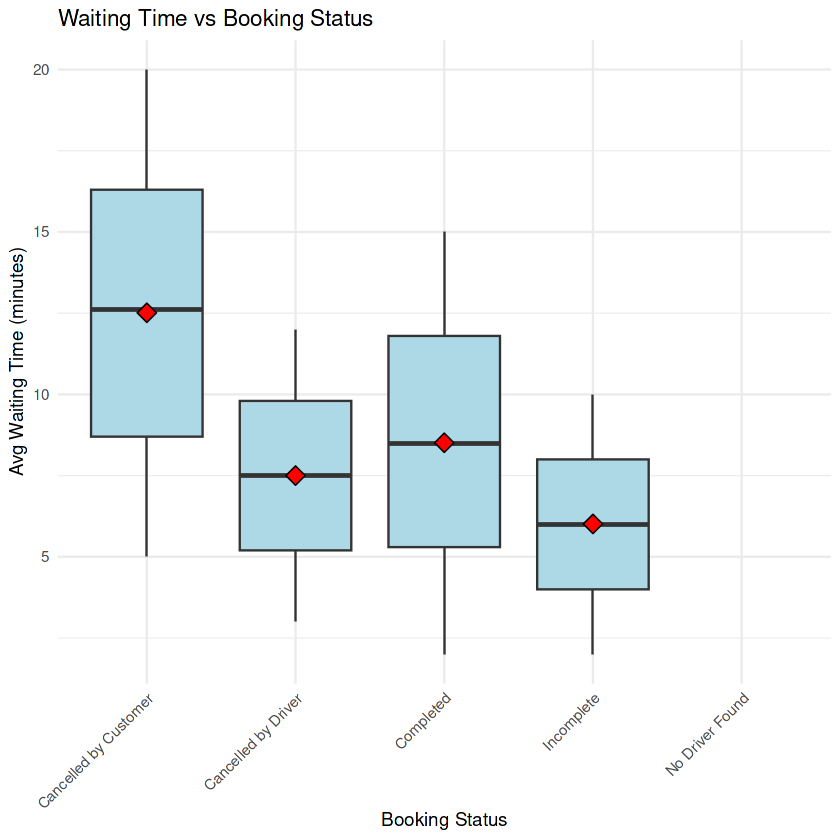

In [17]:
# Boxplot for waiting time vs booking status with average waiting time highlighted
ggplot(uber_data, aes(x = `Booking Status`, y = `Avg VTAT`)) +
  geom_boxplot(fill = "lightblue") +
  # Add a red dot to show the average waiting time on each box
  stat_summary(fun = mean, geom = "point", shape = 23, size = 4, fill = "red") +
  theme_minimal() +
  labs(title = "Waiting Time vs Booking Status", x = "Booking Status", y = "Avg Waiting Time (minutes)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Insight**: The boxplot visually confirms that waiting time is directly linked to customer cancellations. The Cancelled by Customer category has a significantly higher average waiting time than any other group, proving that longer waits lead to customers abandoning their trips.

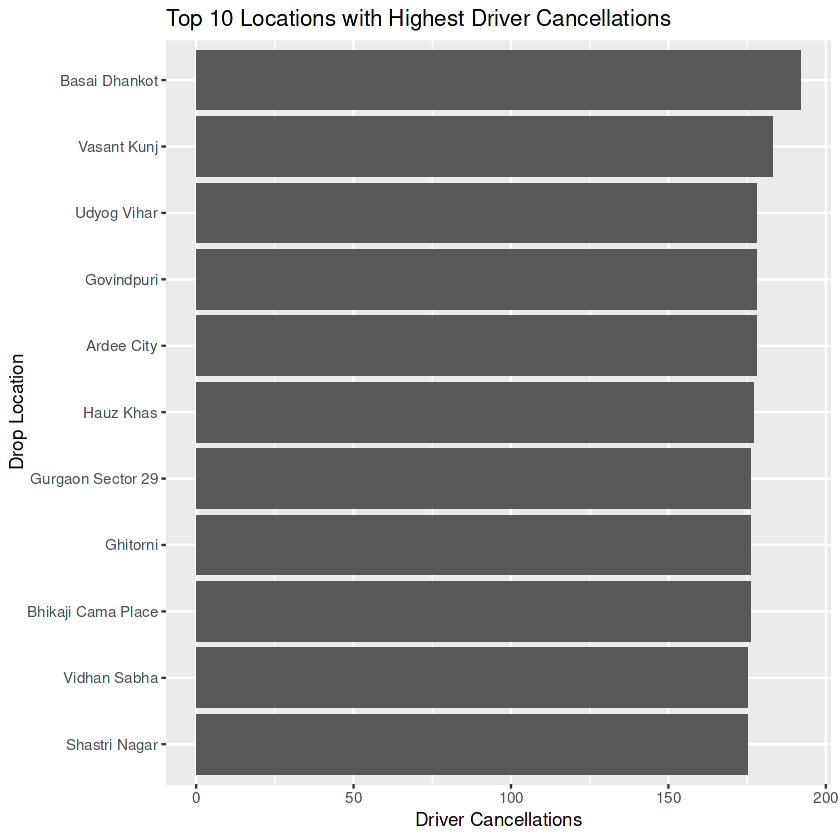

In [18]:
# Corrected code for the bar chart
uber_data %>%
  group_by(`Drop Location`) %>%
  summarise(Driver_Cancel = sum(`Booking Status` == "Cancelled by Driver", na.rm = TRUE)) %>%
  arrange(desc(Driver_Cancel)) %>%
  top_n(10, Driver_Cancel) %>%
  ggplot(aes(x = reorder(`Drop Location`, Driver_Cancel), y = Driver_Cancel)) +
  geom_col() +
  coord_flip() +
  labs(title = "Top 10 Locations with Highest Driver Cancellations",
       x = "Drop Location",
       y = "Driver Cancellations")

**Insight**: The bar chart identifies the specific region with the highest number of driver cancellations. This visually supports the conclusion that the cancellation problem is not random but concentrated in certain areas.

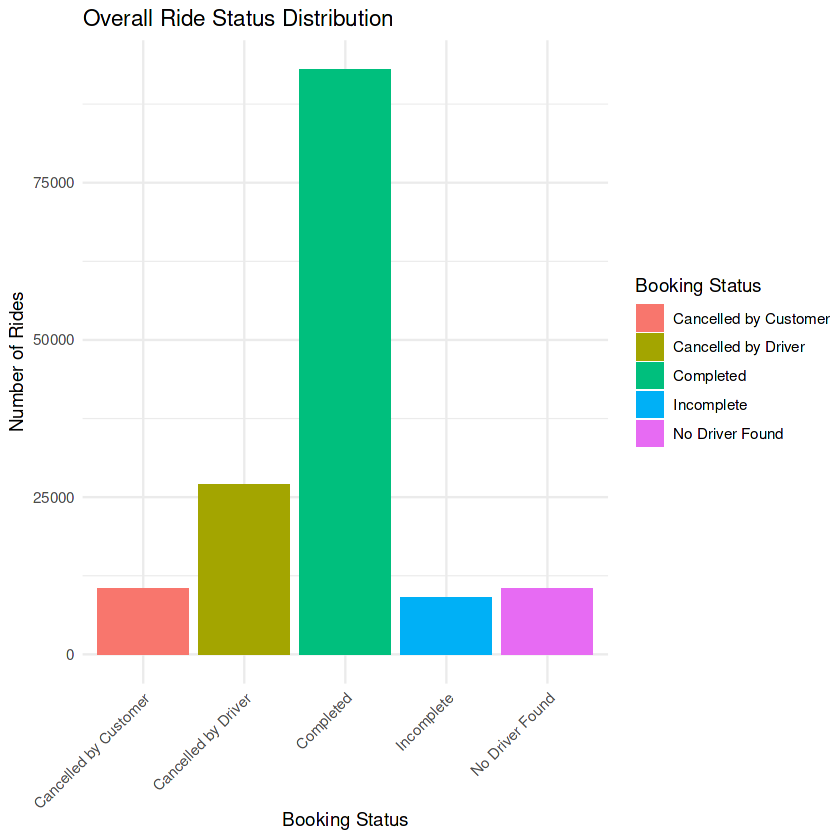

In [19]:
# Overall Ride Status Bar Chart

uber_data %>%
  ggplot(aes(x = `Booking Status`, fill = `Booking Status`)) +
  geom_bar() +
  labs(
    title = "Overall Ride Status Distribution",
    x = "Booking Status",
    y = "Number of Rides"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Insight**: The bar chart visually confirms that while the majority of rides are completed, driver cancellations are the single largest reason for an uncompleted trip.

# **8. Conclusion and Recommendations**

**Conclusion**

Based on a comprehensive analysis of the rideshare data, the primary challenge is a high rate of uncompleted rides, with **driver cancellations** being the largest single contributing factor. The analysis showed that this is not a random problem, but a **systemic issue** that is concentrated in specific locations and with certain vehicle types. Most critically, driver cancellations are the likely root cause of **longer waiting times**, which in turn leads to customer cancellations. Therefore, to improve overall ride completion, the company must focus on addressing driver behavior and incentives.

**Recommendations**

* Record essential metrics, such as estimated distance and waiting time, for all ride requests, including those that are cancelled. This is crucial for future analysis and business intelligence.

* Focus on reducing driver cancellations, as this is the primary driver of longer waiting times and subsequent customer cancellations.

* Use the analysis of location and vehicle types to create specific solutions for high-cancellation zones and high-cancellation vehicle types.

* Consider offering incentives or bonuses for drivers who maintain a low cancellation rate, particularly in the problematic locations you identified.
